#Taller Deep Learning

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Conjunto de entrenamiento: {x_train.shape}, etiquetas: {y_train.shape}")
print(f"Conjunto de prueba: {x_test.shape}, etiquetas: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Conjunto de entrenamiento: (60000, 28, 28), etiquetas: (60000,)
Conjunto de prueba: (10000, 28, 28), etiquetas: (10000,)


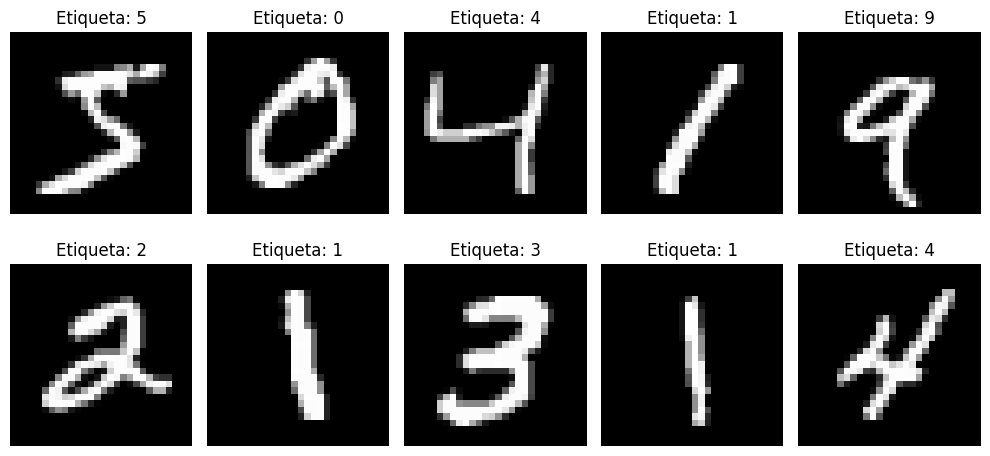

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(f"Etiqueta: {y_train[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [12]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [13]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Forma de las etiquetas después de one-hot encoding: {y_train.shape}")

Forma de las etiquetas después de one-hot encoding: (60000, 10)


##EDA

1. Distribución de clases:

El dataset es balanceado, es decir, contiene aproximadamente la misma cantidad de imágenes para cada dígito (0-9). Esto es ideal, ya que evita que el modelo se sesgue hacia una clase específica.

La distribución uniforme permite que el modelo aprenda patrones de cada número sin que haya una predominancia de un solo dígito.

2. Características Visuales de los dígitos:

Las imágenes son en escala de grises (28x28 píxeles), lo que reduce la complejidad computacional en comparación con imágenes en color.

Hay cierta variabilidad en la forma en que las personas escriben los dígitos, lo que desafía al modelo a generalizar mejor.

Algunos números como el "4" y el "9" pueden ser más difíciles de diferenciar debido a similitudes en ciertos estilos de escritura.

3. Preprocesamiento y Normalización:

Convertir los valores de píxeles de 0-255 a un rango de 0-1 (normalización) ayuda a que el modelo aprenda más eficientemente.

Sin esta normalización, el modelo podría verse afectado por grandes diferencias de escala, lo que haría que algunos pesos dominaran sobre otros durante el entrenamiento.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

modelo = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

modelo.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

modelo.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
historial = modelo.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8768 - loss: 0.4243 - val_accuracy: 0.9646 - val_loss: 0.1235
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9664 - loss: 0.1100 - val_accuracy: 0.9649 - val_loss: 0.1016
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9786 - loss: 0.0680 - val_accuracy: 0.9763 - val_loss: 0.0791
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9834 - loss: 0.0527 - val_accuracy: 0.9740 - val_loss: 0.0803
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9872 - loss: 0.0403 - val_accuracy: 0.9735 - val_loss: 0.0914
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9905 - loss: 0.0299 - val_accuracy: 0.9789 - val_loss: 0.0760
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9917 - loss: 0.0261 - val_accuracy: 0.9738 - val_loss: 0.1031
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9930 - loss: 0.

In [16]:
pérdida, precisión = modelo.evaluate(x_test, y_test)

print(f"Pérdida en test: {pérdida:.4f}")
print(f"Precisión en test: {precisión:.4%}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.1082
Pérdida en test: 0.0892
Precisión en test: 97.7600%


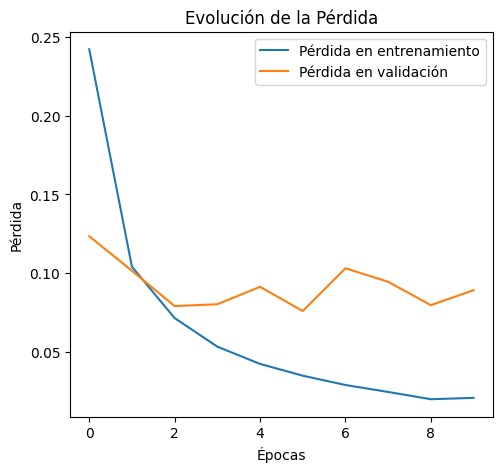

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(historial.history['loss'], label='Pérdida en entrenamiento')
plt.plot(historial.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la Pérdida')

plt.show()

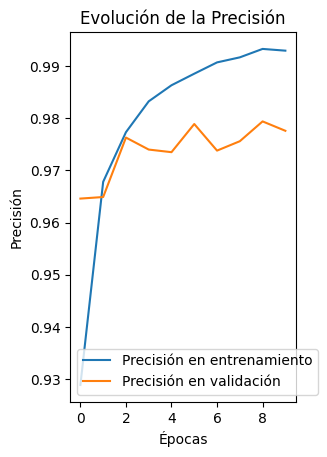

In [18]:
plt.subplot(1, 2, 2)
plt.plot(historial.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Evolución de la Precisión')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


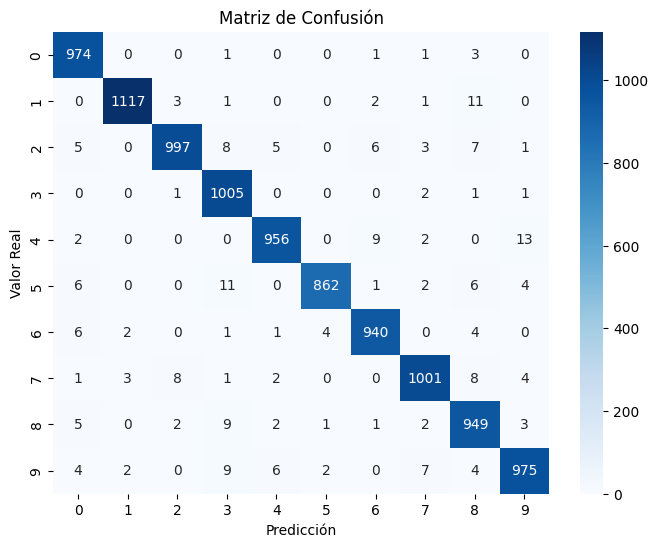

In [19]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(modelo.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

##Conclusiones

1. Rendimiento del modelo:

La red neuronal alcanzó una precisión del 97.76% en el conjunto de prueba.

La pérdida en validación es baja, lo que indica que el modelo generaliza bien a nuevos datos.

2. Gráficos de evolución del entrenamiento:

La pérdida en entrenamiento disminuye de manera estable, lo que indica que el modelo aprende correctamente.

Sin embargo, la pérdida en validación se mantiene ligeramente más alta, lo que puede ser un indicio de que el modelo aún tiene margen de mejora.

3. Matriz de confusión:

La mayoría de los dígitos son clasificados correctamente.

Se observan algunos errores en clases visualmente similares, como el 5 y el 3 o el 4 y el 9.

Esto sugiere que añadir más ejemplos o realizar técnicas de aumento de datos podría mejorar el rendimiento.